In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [44]:
# Perform API call
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Get latitude and temperature for cities

# set up lists to hold reponse info
lat = []
temp = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    print(city)
    try:
        city_response = requests.get(query_url + city).json()
    except Exception as e:
        print(e)
    try:
        lat.append(city_response['coord']['lat'])
    except Exception as e: 
        print(e)
        lat.append('NaN')
    try:
        temp.append(city_response['main']['temp'])
    except Exception as e:
        print(e)
        temp.append('NaN')
    try:
        max_temp.append(city_response['main']['temp_max'])
    except Exception as e:
        print(e)
        max_temp.append('NaN')
    try:
        humidity.append(city_response['main']['humidity'])
    except Exception as e:
        print(e)
        humidity.append('NaN')
    try:
        cloudiness.append(city_response['clouds']['all'])
    except Exception as e:
        print(e)
        cloudiness.append('NaN')
    try:
        windspeed.append(city_response['wind']['speed'])
    except Exception as e:
        print(e)
        windspeed.append('NaN')
    time.sleep(1)
# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")

bluff
butaritari
atuona
katsuura
palabuhanratu
'coord'
'main'
'main'
'main'
'clouds'
'wind'
barrow
albany
iqaluit
jamestown
naze
punta arenas
illoqqortoormiut
'coord'
'main'
'main'
'main'
'clouds'
'wind'
codrington
pabrade
puerto ayora
cadillac
vaitupu
'coord'
'main'
'main'
'main'
'clouds'
'wind'
rikitea
ushuaia
busselton
warrnambool
dire dawa
fatehpur
kodiak
vaini
cabo san lucas
hermanus
brae
constitucion
massakory
sterling
ponta do sol
fartura
yellowknife
ribeira grande
heihe
ovsyanka
barcelos
kuche
'coord'
'main'
'main'
'main'
'clouds'
'wind'
eyemouth
tongchuan
lasa
chippewa falls
kruisfontein
yumen
mahebourg
makakilo city
hamilton
belushya guba
'coord'
'main'
'main'
'main'
'clouds'
'wind'
rocha
hilo
clyde river
isla mujeres
khatanga
oussouye
provideniya
lavrentiya
klaksvik
pascagoula
esperance
san andres
arona
faanui
port elizabeth
nome
beaufort
cape town
sredec
'coord'
'main'
'main'
'main'
'clouds'
'wind'
lorengau
coihaique
saint george
sesheke
masjed-e soleyman
'coord'
'main'
'ma

In [51]:
# Convert raw data to data frame

data_dict = {'City': cities,
             'Latitude': lat,
             'Temperature': temp,
             'Maximum Temperature': max_temp,
             'Humidity': humidity,
             'Cloudiness': cloudiness,
             'Windspeed': windspeed}

cities_df = pd.DataFrame(data_dict)
cities_df = cities_df.replace('NaN', np.NaN)
cities_df = cities_df.dropna()

cities_df.head()

,City,Latitude,Temperature,Maximum Temperature,Humidity,Cloudiness,Windspeed
0,bluff,-46.60,53.01,53.01,82.0,100.0,8.01
1,butaritari,3.07,83.88,83.88,79.0,100.0,23.69
2,atuona,-9.80,83.16,83.16,65.0,0.0,9.98
3,katsuura,35.13,41.99,42.80,52.0,20.0,9.17
5,barrow,71.29,17.60,17.60,85.0,90.0,21.92


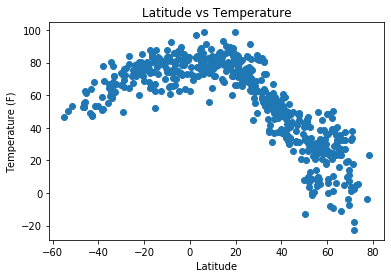

In [54]:
# Latitude vs. Temperature Plot

plt.scatter(cities_df['Latitude'], cities_df['Temperature'])
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

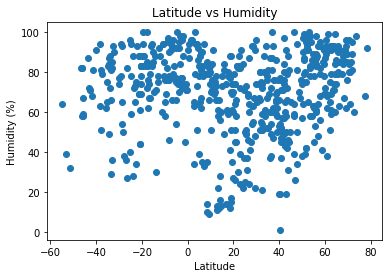

In [55]:
# Latitude vs. Humidity Plot
plt.scatter(cities_df['Latitude'], cities_df['Humidity'])
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

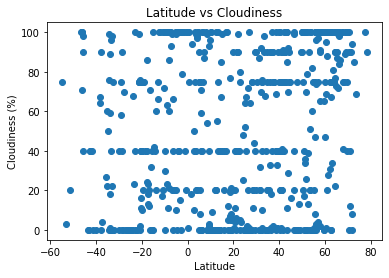

In [56]:
# Latitude vs. Cloudiness Plot
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness'])
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

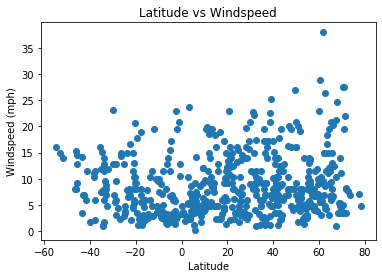

In [57]:
# Latitude vs. Wind Speed Plot
plt.scatter(cities_df['Latitude'], cities_df['Windspeed'])
plt.title('Latitude vs Windspeed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.show()

In [58]:
# OPTIONAL: Create a function to create Linear Regression plots
 
def regressplot(x_values, y_values, title, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f'{title}')
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    # Print r square value
    print(f"The r is: {rvalue}")
    return


The r is: 0.1737553688330899


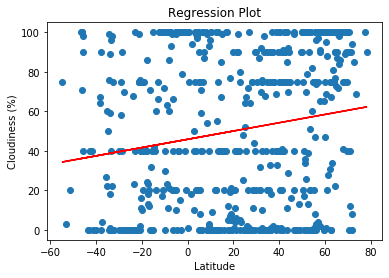

In [59]:
regressplot(cities_df['Latitude'], cities_df['Cloudiness'], 'Regression Plot', 'Latitude', 'Cloudiness (%)')

In [61]:
# Create Northern and Southern Hemisphere DataFrames
cities_north = cities_df.loc[cities_df['Latitude'] > 0]
cities_south = cities_df.loc[cities_df['Latitude'] < 0]


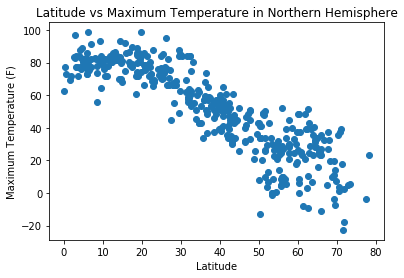

In [62]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(cities_north['Latitude'], cities_north['Maximum Temperature'])
plt.title('Latitude vs Maximum Temperature in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.show()

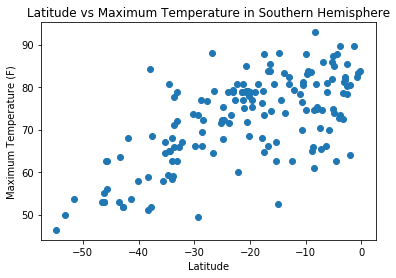

In [63]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(cities_south['Latitude'], cities_south['Maximum Temperature'])
plt.title('Latitude vs Maximum Temperature in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.show()

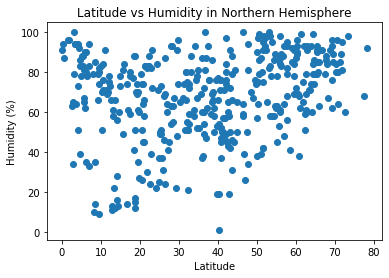

In [64]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(cities_north['Latitude'], cities_north['Humidity'])
plt.title('Latitude vs Humidity in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

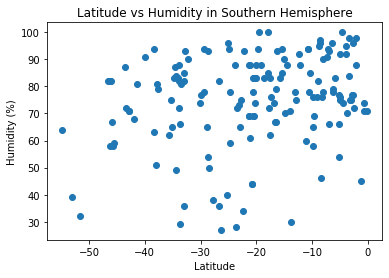

In [65]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(cities_south['Latitude'], cities_south['Humidity'])
plt.title('Latitude vs Humidity in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

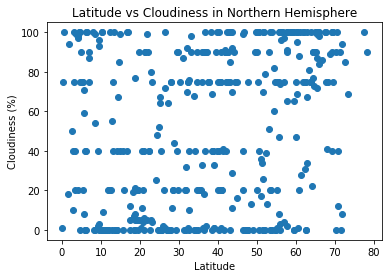

In [66]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(cities_north['Latitude'], cities_north['Cloudiness'])
plt.title('Latitude vs Cloudiness in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

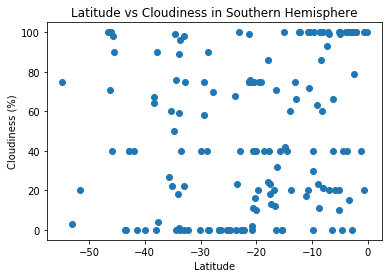

In [68]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(cities_south['Latitude'], cities_south['Cloudiness'])
plt.title('Latitude vs Cloudiness in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

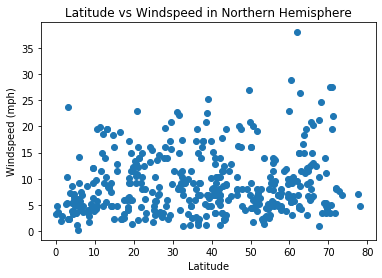

In [69]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(cities_north['Latitude'], cities_north['Windspeed'])
plt.title('Latitude vs Windspeed in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.show()

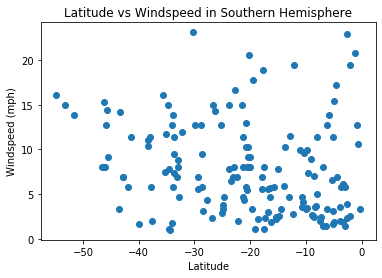

In [70]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(cities_south['Latitude'], cities_south['Windspeed'])
plt.title('Latitude vs Windspeed in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.show()